## A detailed analysis of the stackoverflow developer survey 2024:
The Stack Overflow Developer Survey 2024 offers invaluable insights into the evolving landscape of software development. This year’s survey draws from a diverse pool of developers, showcasing trends, skills, and industry concerns on advancement of Artificial Intelligence. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

survey_raw_df = pd.read_csv('survey_results_public.csv', index_col='ResponseId')

selected_columns = [
    'Country',
    'Age',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'LearnCode',
    # Employment
    'Employment',
    'DevType',
    'RemoteWork',
    'WorkExp',
    'CodingActivities',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LanguageAdmired',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'AIThreat',
    'AINextMore integrated',
    'AINextMuch more integrated',
    'AINextNo change',
    'AINextLess integrated',
    'AINextMuch less integrated',

]

survey_df = survey_raw_df[selected_columns].copy()
schema_raw = pd.read_csv('survey_results_schema.csv', index_col='qname').question

schema = schema_raw[[
    'Country',
    'Age',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'LearnCode',
    # Employment
    'Employment',
    'RemoteWork',
    'DevType',
    'WorkExp',
    'CodingActivities',
    'Database',
    'BuildvsBuy',
    'AIThreat',
    'AINext'
]]

survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

#### 1. Demographics: A Global Snapshot
The survey highlights that while tech talent remains concentrated in countries like the United States of America, Germany and India.  There has been a surge in developers from emerging markets such as Netherlands, Brazil, and Eastern Europe. These countries are establishing themselves as growing tech hubs, fueled by remote work opportunities and increasing access to tech education.

##### * Observations: 
The rise of talent from non-traditional tech markets is likely driven by a combination of remote-first company cultures and online learning platforms. Developers from these regions may also be opting for freelance work or remote employment for companies in established markets, further contributing to the globalization of tech work.

##### * Impact:
As companies look to diversify their talent pool, this trend may accelerate. We might see more investment in talent development programs in emerging markets, which could disrupt the traditional geographical distribution of developers.

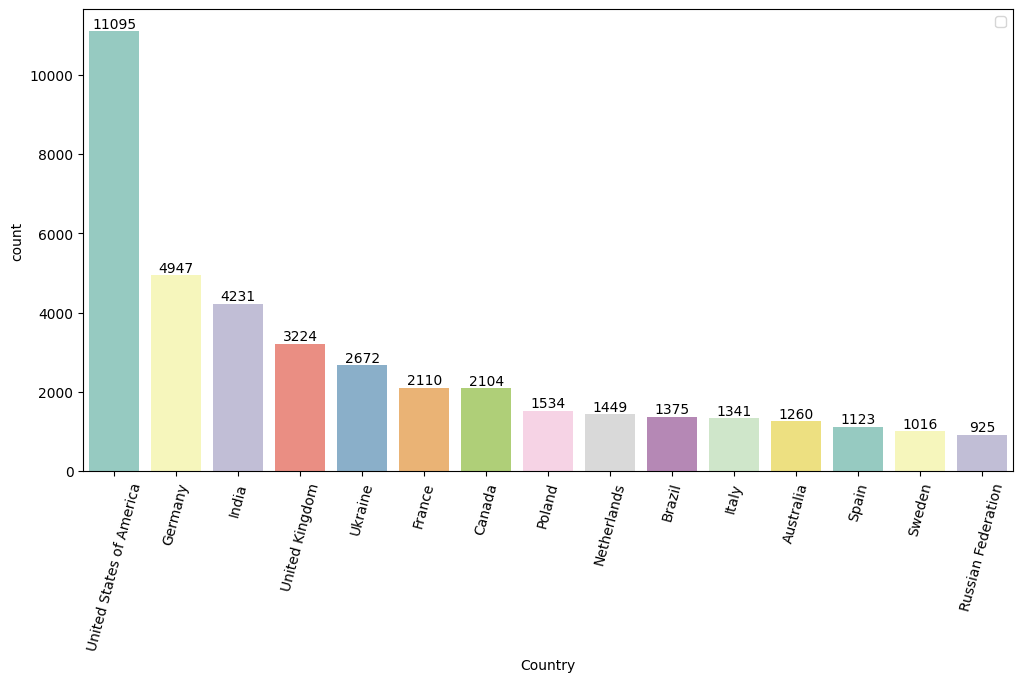

In [2]:

survey_df.Country = survey_df.Country.replace(to_replace='United Kingdom of Great Britain and Northern Ireland', value='United Kingdom')
top_countries = survey_df.Country.value_counts().head(15)
top_countries = pd.DataFrame(top_countries)

plt.figure(figsize=(12, 6))
plt.legend(schema.Country)
plt.xticks(rotation=75)
ax = sns.barplot(x=top_countries.index, y=top_countries.loc[:,'count'], hue=top_countries.index, palette='Set3');
for a in ax.containers:
    ax.bar_label(a, fontsize=10)


In [3]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
def split_multicolumn(column_series):
        result_df = column_series.to_frame()
        options = []
        for idx, values in column_series[column_series.notnull()].items():
                for option in values.split(';'):
                        if not option in result_df.columns:
                                options.append(option)
                                result_df[option] = False
                        result_df.at[idx, option] = True
        return result_df

#### 2. Educational Attainments of All Survey Respondents

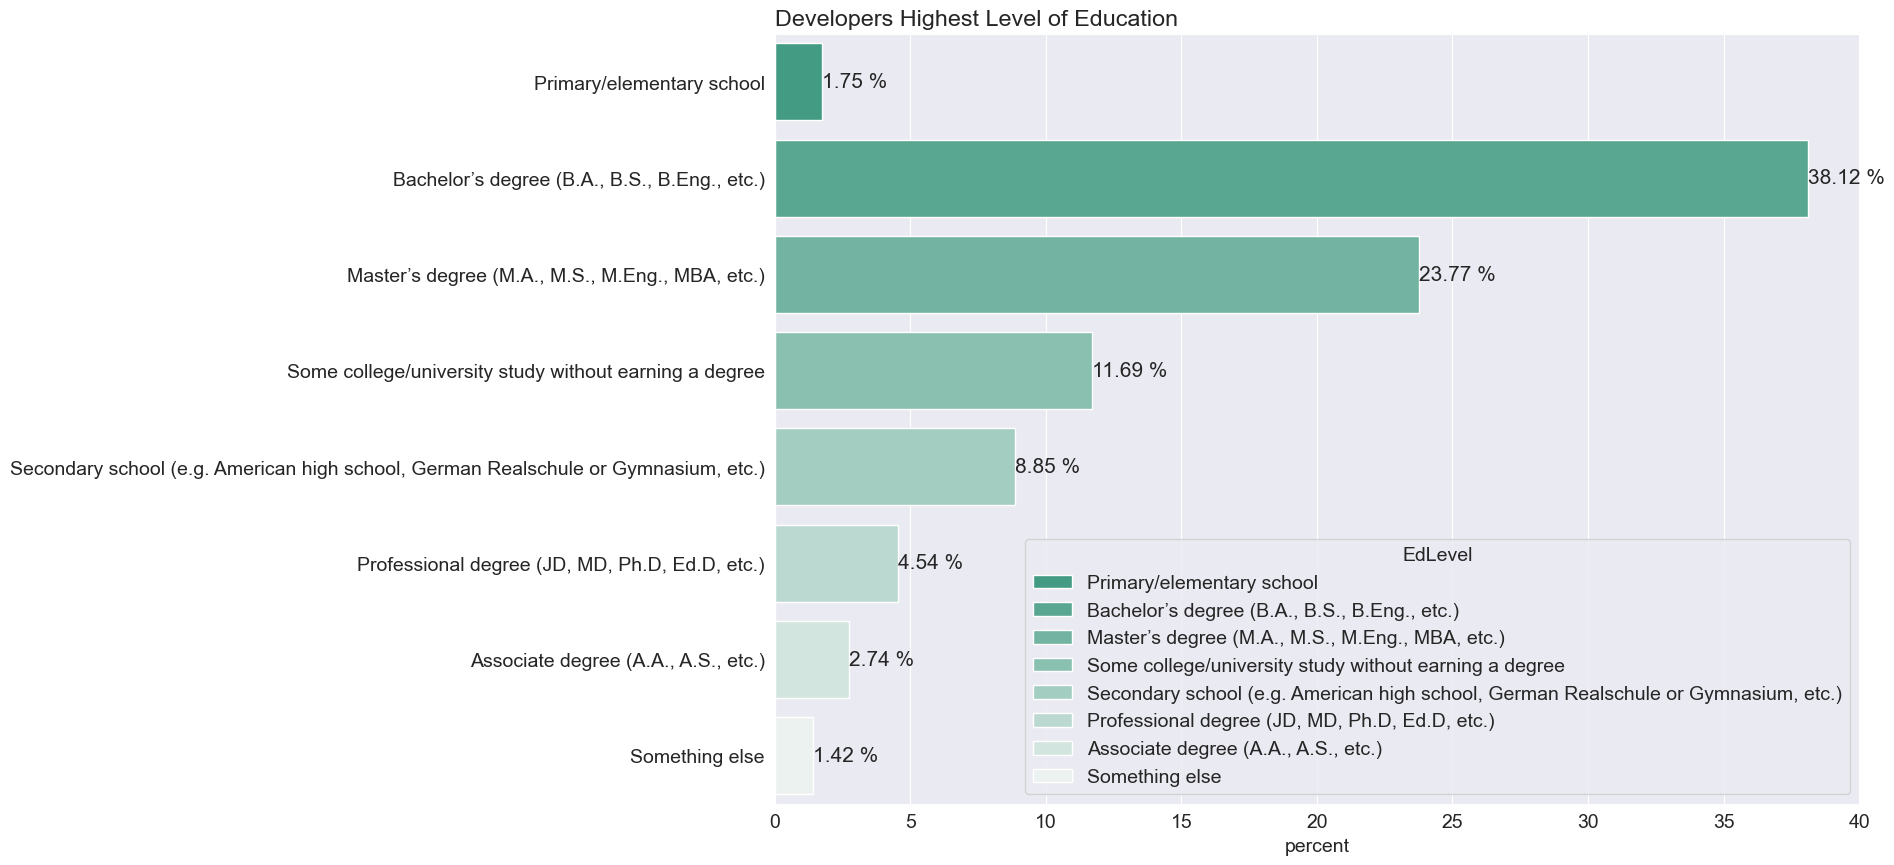

In [5]:
plt.figure(figsize=(14, 10))
sns.set_style('darkgrid')
sns.axes_style('darkgrid')
ax = sns.countplot(y='EdLevel', hue='EdLevel', palette='light:#3A8_r', stat='percent', data=survey_df);
plt.ylabel(None)
plt.title("Developers Highest Level of Education", loc='left');
for ai in ax.containers:
    ax.bar_label(ai, fontsize=15, fmt=lambda x: f'{x:.2f} %')

### Professional Developers

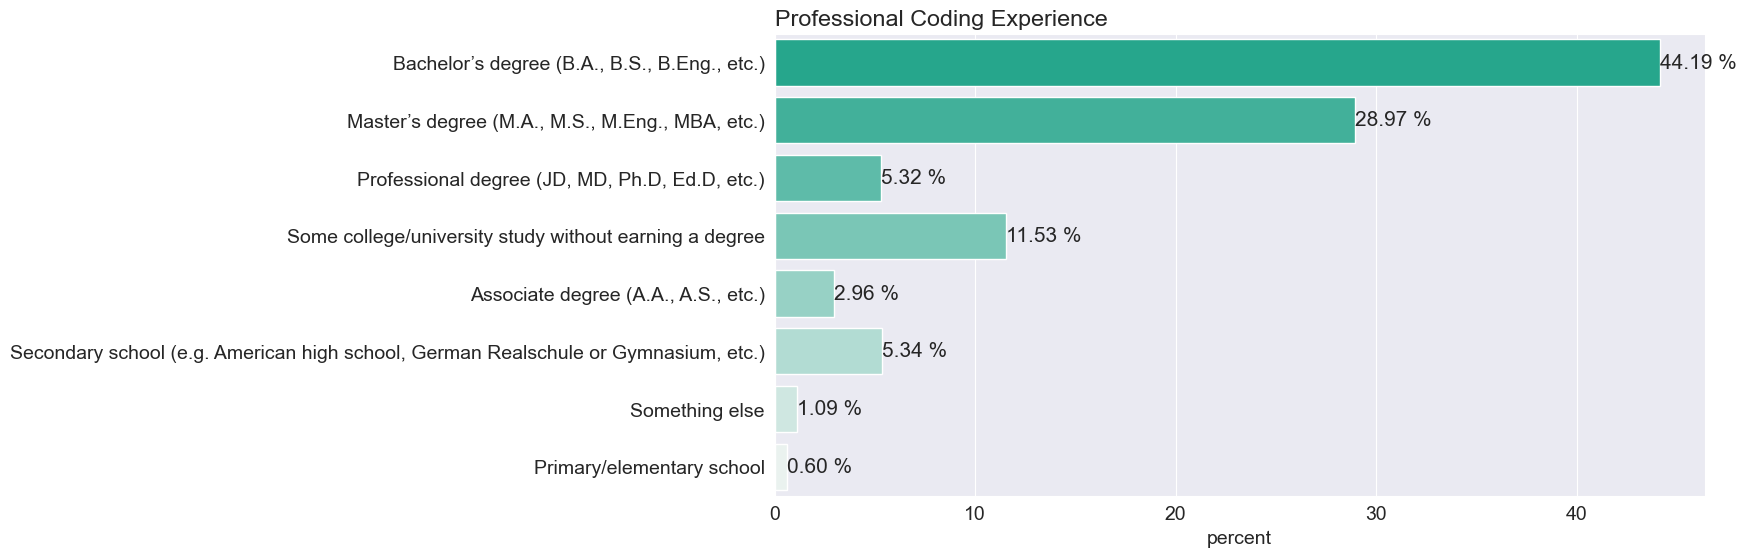

In [6]:
pro_coders = survey_df[survey_df.YearsCodePro.notna()]
ax = sns.countplot(y='EdLevel', hue='EdLevel', stat='percent', palette='light:#1B9_r', data=pro_coders);
plt.ylabel(None)
plt.title("Professional Coding Experience", loc='left');

for ai in ax.containers:
    ax.bar_label(ai, fontsize=15, fmt=lambda x: f'{x:.2f} %')

## Resources used to Learn coding.

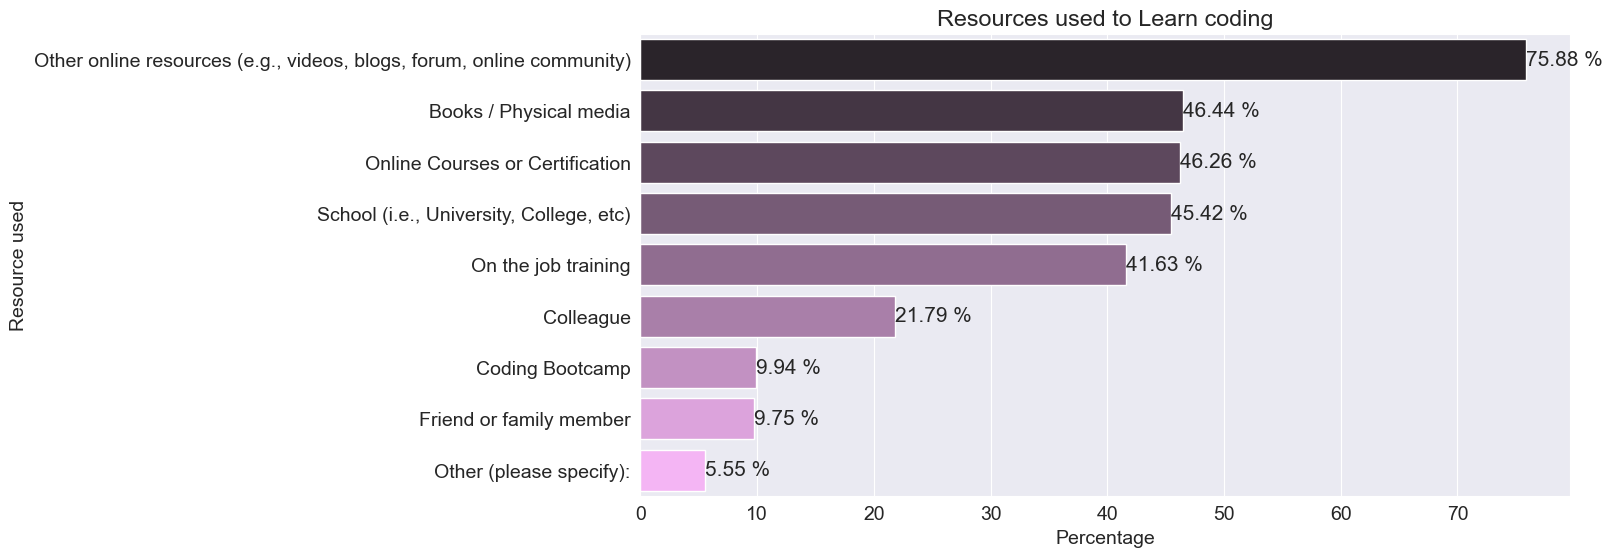

In [7]:
resource_used_df = split_multicolumn(survey_df.LearnCode)
resource_used_df.drop(columns='LearnCode', inplace=True)
resource_used_count = (resource_used_df.mean().sort_values(ascending=False) * 100)

plt.title("Resources used to Learn coding")
plt.xlabel("Percentage")
plt.ylabel('Resource used')
ax = sns.barplot(x=resource_used_count, y=resource_used_count.index, hue=resource_used_count.index, palette='dark:#faf1')

for ai in ax.containers:
    ax.bar_label(ai, fontsize=15, fmt=lambda x: f'{x:.2f} %')


## Resources used by various Age group people

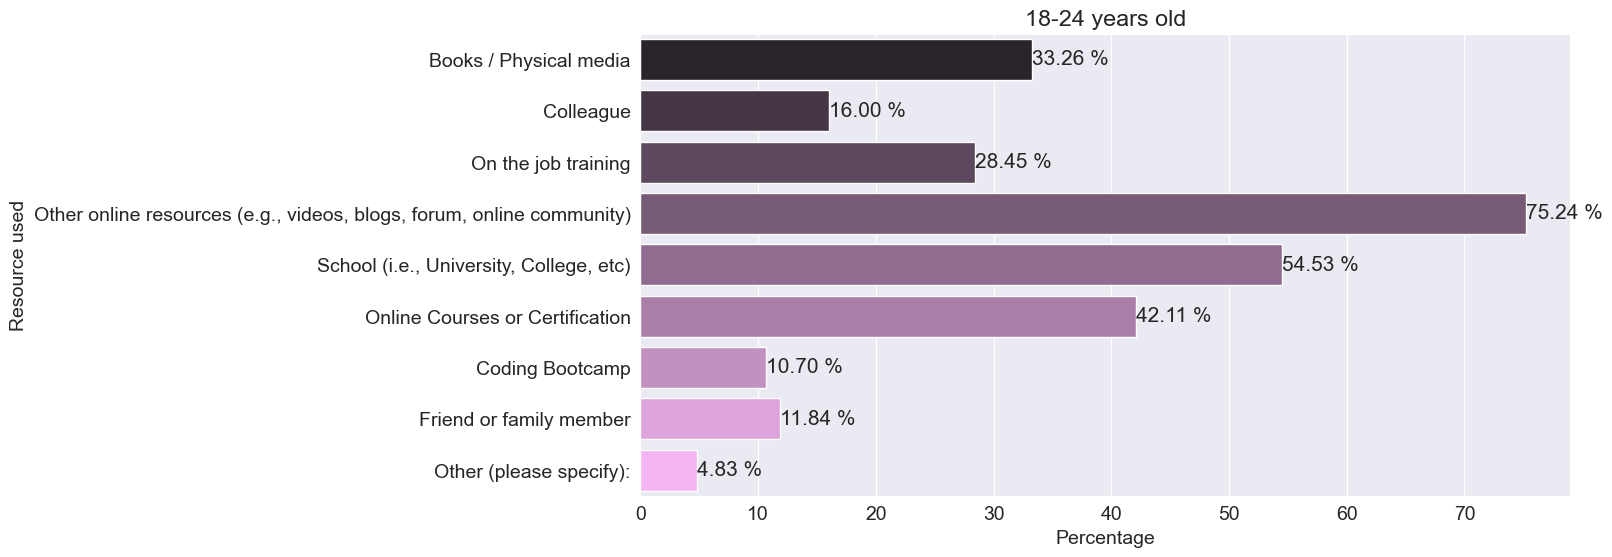

In [8]:
resource_used_df = split_multicolumn(survey_df.LearnCode)
resource_used_df.drop(columns='LearnCode', inplace=True)
resource_used_df['Age'] = survey_df.Age 
age_group = resource_used_df.groupby('Age').mean() * 100

plt.xlabel("Percentage")
plt.ylabel('Resource used')

def plot_by_agegroup(age_group_idx, age_group_val, palette):
        plt.title(age_group_idx)
        ax = sns.barplot(x=age_group_val , y=age_group.columns, hue=age_group.columns, palette=palette);
        for ai in ax.containers:
                ax.bar_label(ai, fontsize=15, fmt=lambda x: f'{x:.2f} %')

plot_by_agegroup(age_group.index[0], age_group.values[0], 'dark:#faf1')

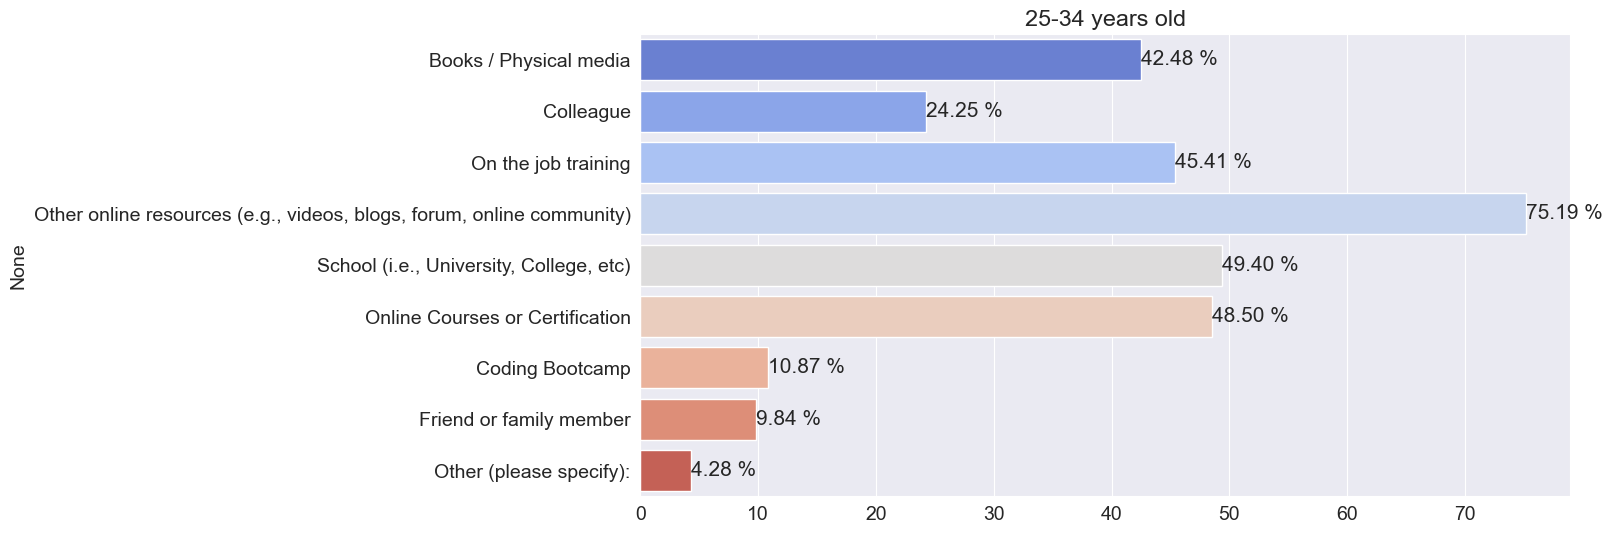

In [9]:
plot_by_agegroup(age_group.index[1], age_group.values[1],'coolwarm' )

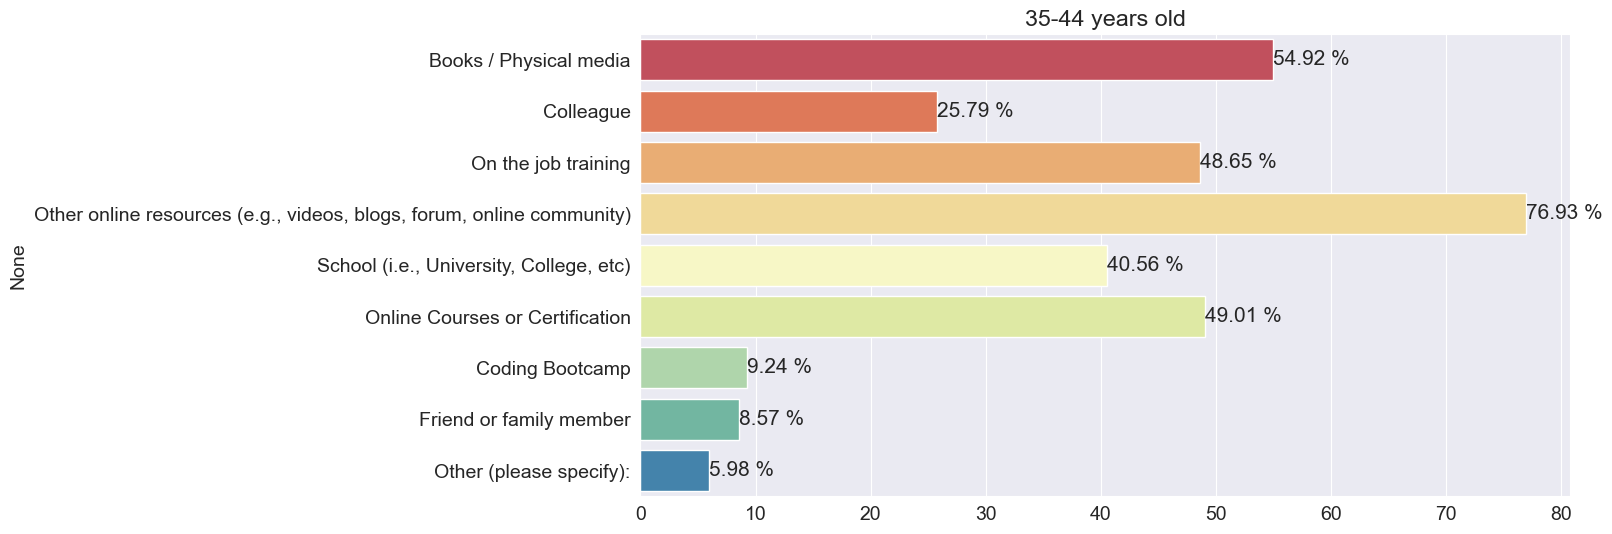

In [10]:
plot_by_agegroup(age_group.index[2], age_group.values[2], 'Spectral')

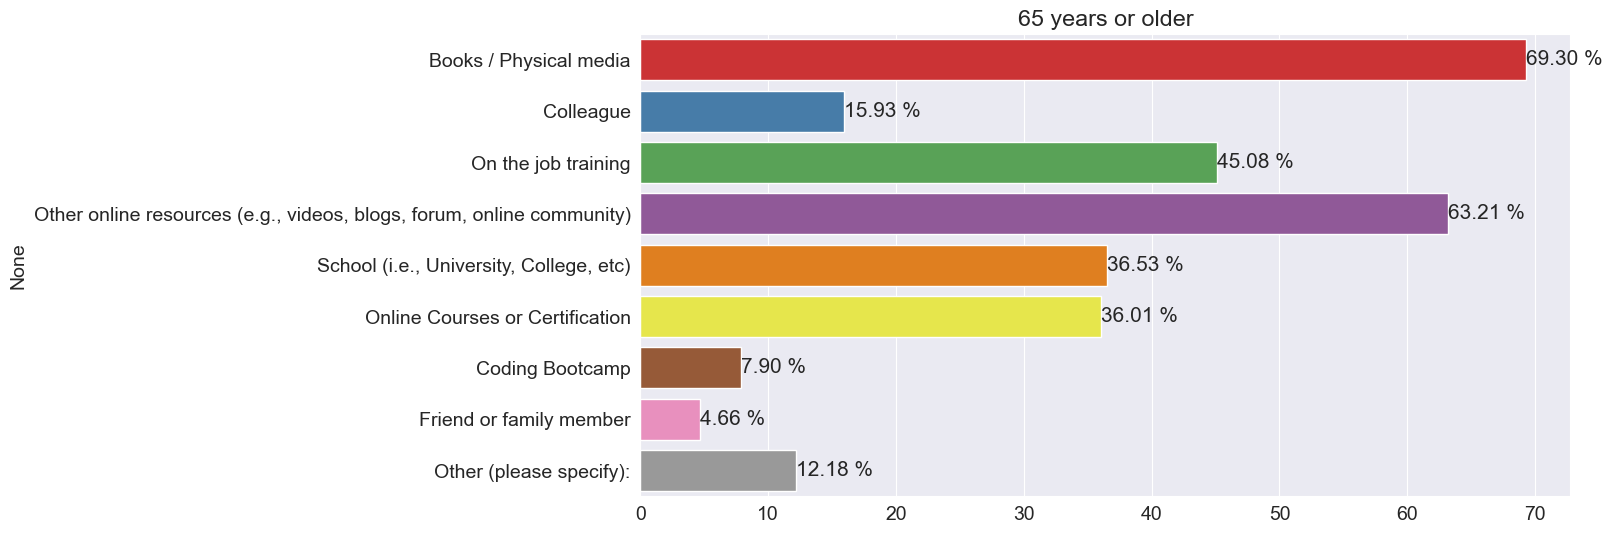

In [11]:
plot_by_agegroup(age_group.index[5], age_group.values[5], 'Set1')

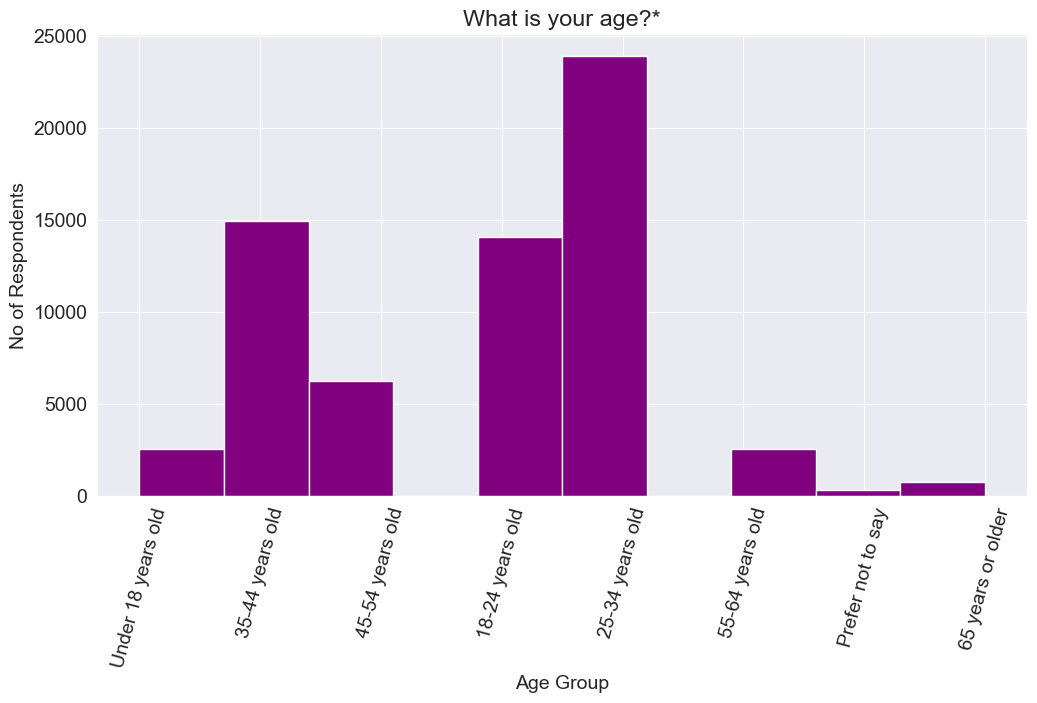

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age Group')
plt.xticks(rotation = 75)
plt.ylabel('No of Respondents')
plt.hist(x=survey_df.Age, color='Purple');

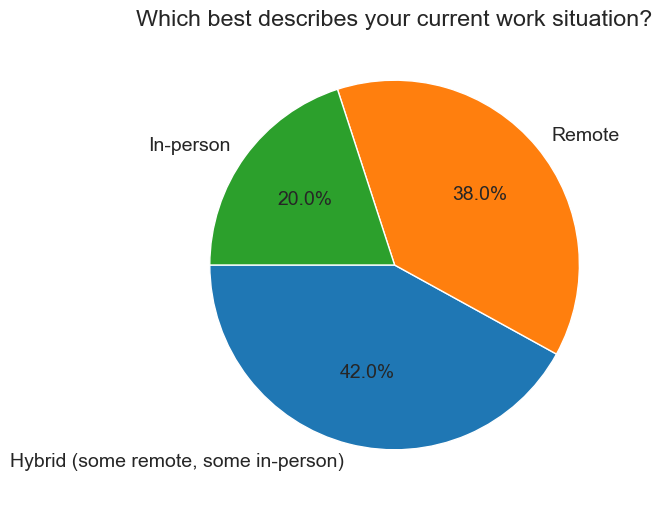

In [13]:
work_count = survey_df.RemoteWork.value_counts()
plt.figure(figsize=(8, 6))
plt.title(schema.RemoteWork)
plt.pie(work_count, labels=work_count.index, autopct='%1.1f%%', startangle=180);

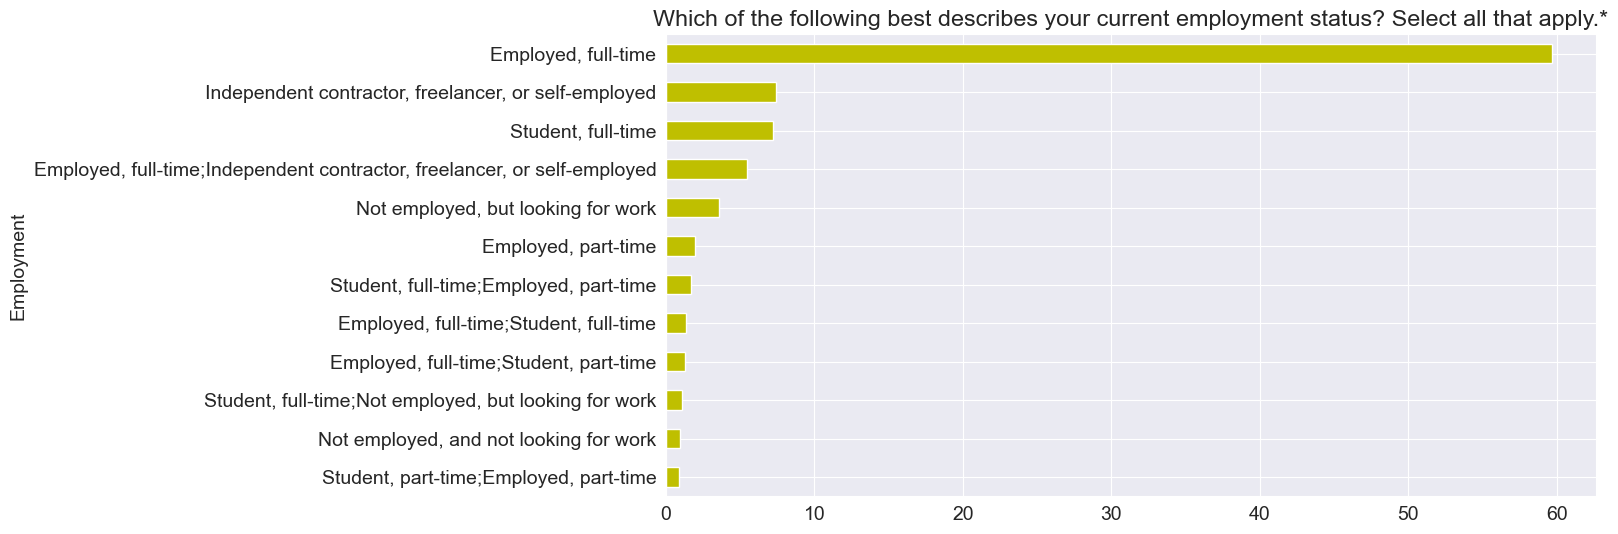

In [14]:
(survey_df.Employment.value_counts(normalize=True, ascending=True).tail(12) * 100).plot(kind='barh', color='y')
sns.set_style('whitegrid')
plt.title(schema.Employment);

## Mostly used language in 2024

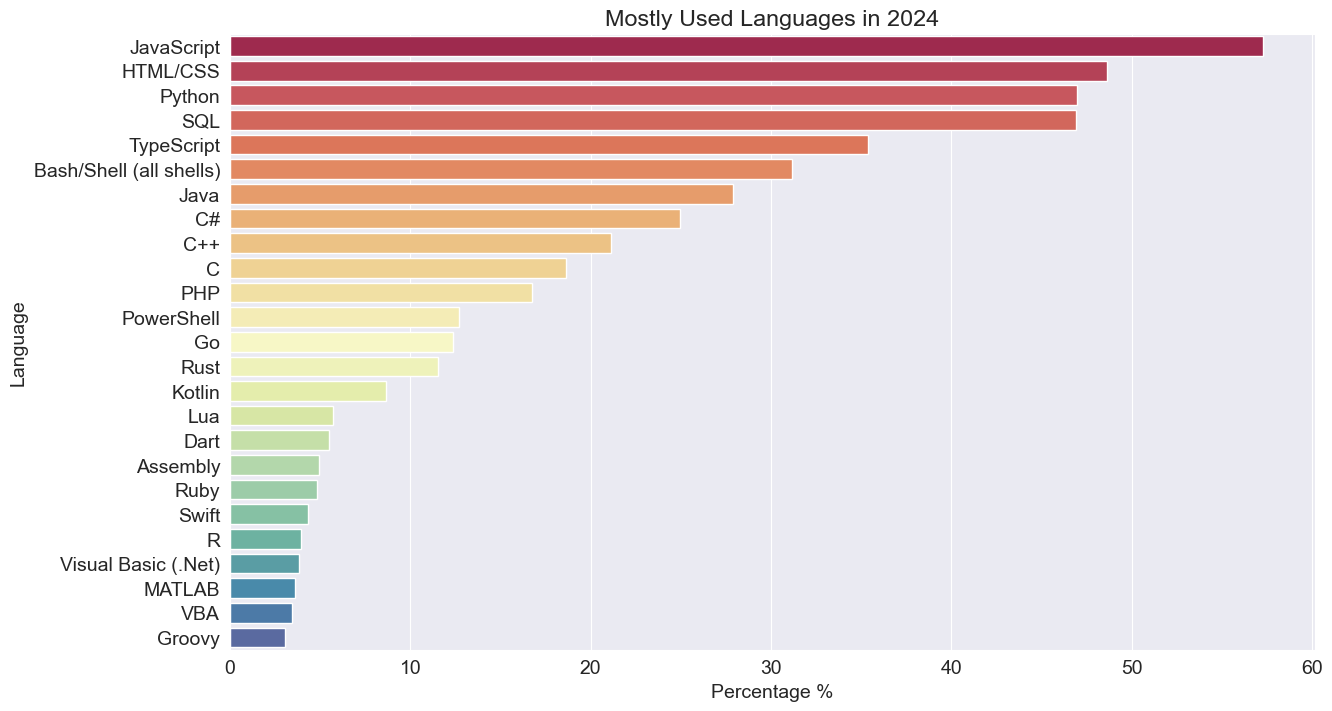

In [15]:
language_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
language_worked_df.drop(columns='LanguageHaveWorkedWith', inplace=True)


sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
plt.ylabel('Language')
plt.xlabel('Percentage %')
language_count = language_worked_df.mean().sort_values(ascending=False).head(25) * 100
sns.barplot(x=language_count, y=language_count.index, hue=language_count.index, palette='Spectral')
plt.title('Mostly Used Languages in 2024'); 

## Mostly choosen Languages to work with in 2024

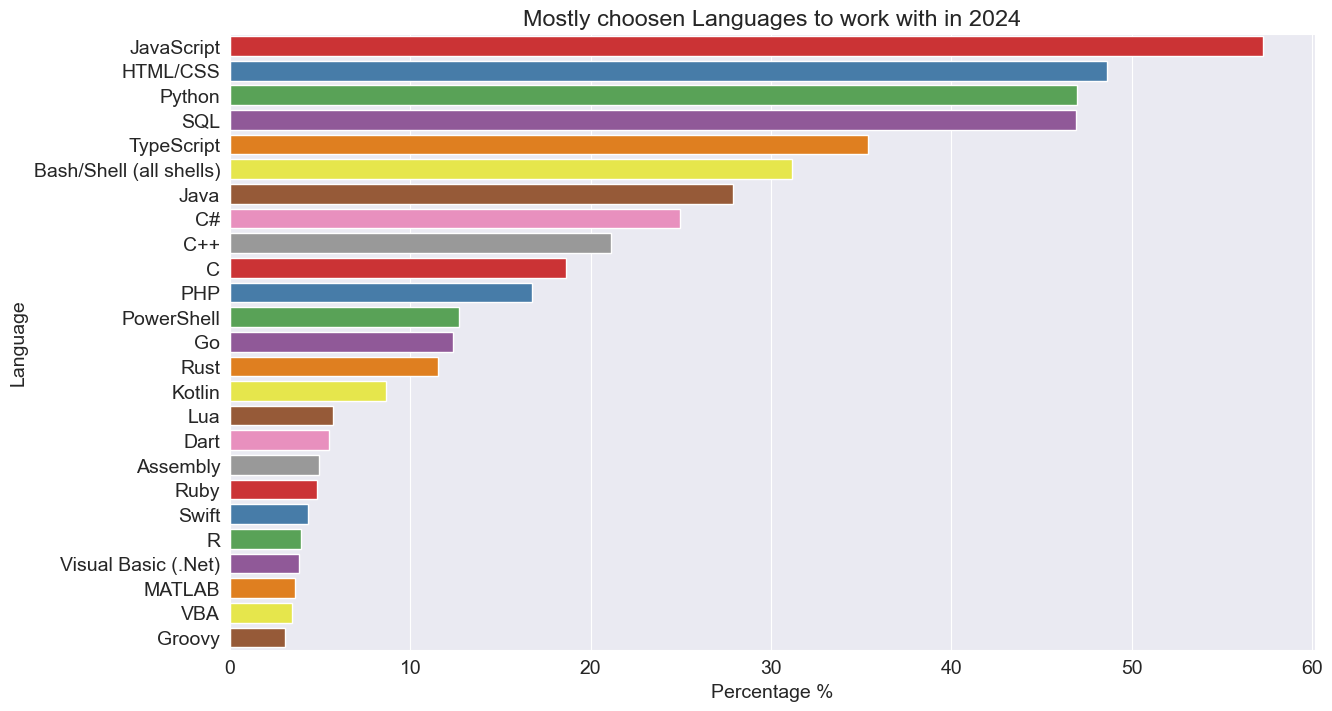

In [16]:
language_want_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
language_want_df.drop(columns='LanguageWantToWorkWith', inplace=True)


sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
plt.ylabel('Language')
plt.xlabel('Percentage %')
language_want_count = language_worked_df.mean().sort_values(ascending=False).head(25) * 100
sns.barplot(x=language_want_count, y=language_want_count.index, hue=language_want_count.index, palette='Set1')
plt.title('Mostly choosen Languages to work with in 2024'); 

## Mostly Loved Languages in 2024

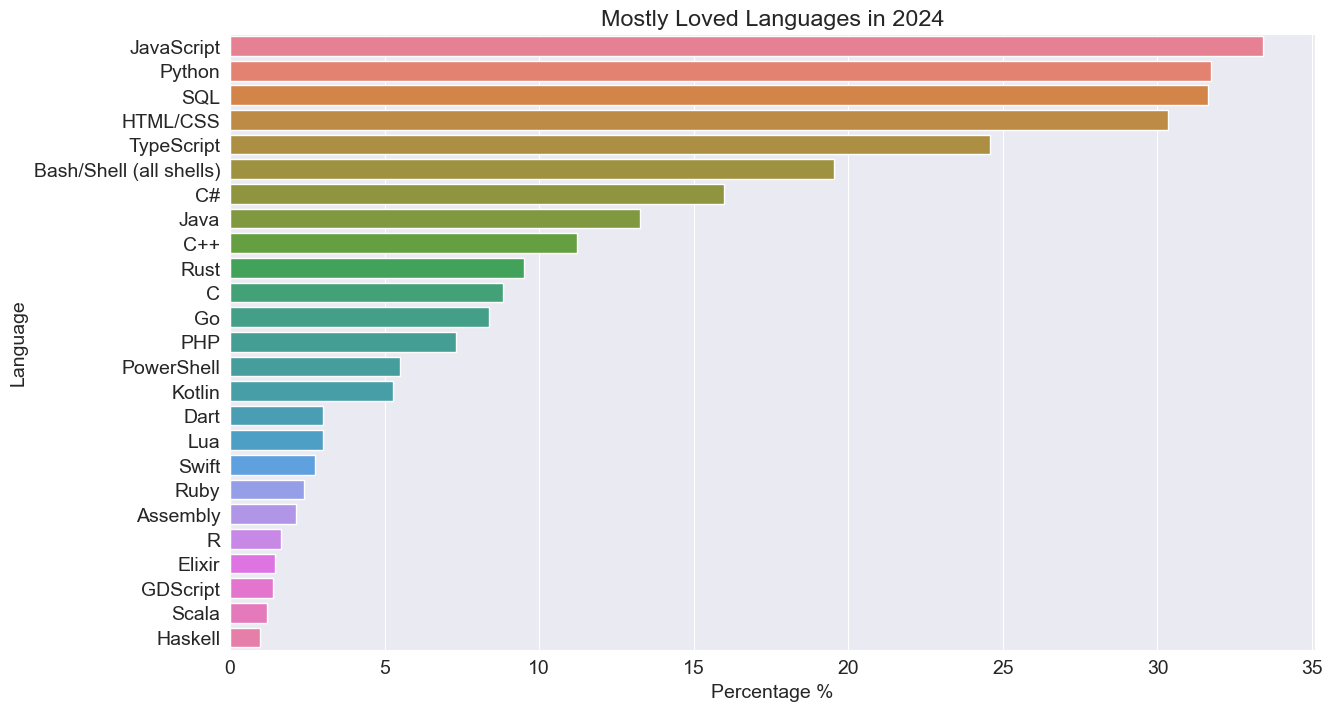

In [17]:
languages_loved_df = language_worked_df & language_want_df

sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
plt.ylabel('Language')
plt.xlabel('Percentage %')
languages_loved_count = languages_loved_df.mean().sort_values(ascending=False).head(25) * 100
sns.barplot(x=languages_loved_count, y=languages_loved_count.index, hue=languages_loved_count.index, palette=None)
plt.title('Mostly Loved Languages in 2024'); 

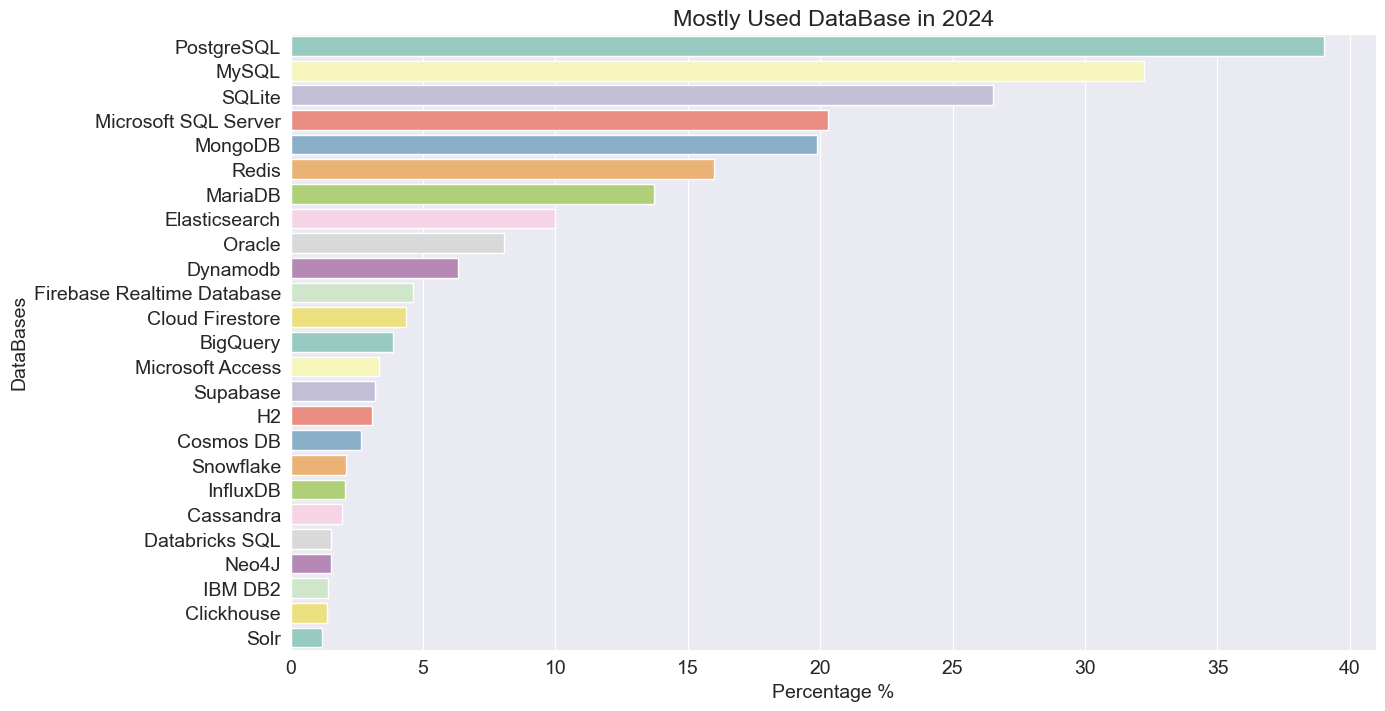

In [18]:
database_df = split_multicolumn(survey_df.DatabaseHaveWorkedWith)
database_df.drop(columns='DatabaseHaveWorkedWith', inplace=True)

sns.set_style('darkgrid')
plt.figure(figsize=(14, 8))
plt.ylabel('DataBases')
plt.xlabel('Percentage %')
database_count = database_df.mean().sort_values(ascending=False).head(25) * 100
sns.barplot(x=database_count, y=database_count.index, hue=database_count.index, palette='Set3')
plt.title('Mostly Used DataBase in 2024'); 

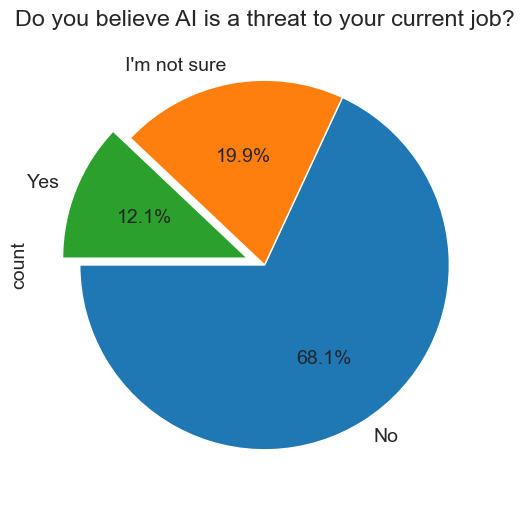

In [19]:
plt.title(schema.AIThreat)
threat = survey_df.AIThreat.value_counts().plot(kind='pie', autopct='%1.1f%%', explode =(0,0,0.1), startangle=180)

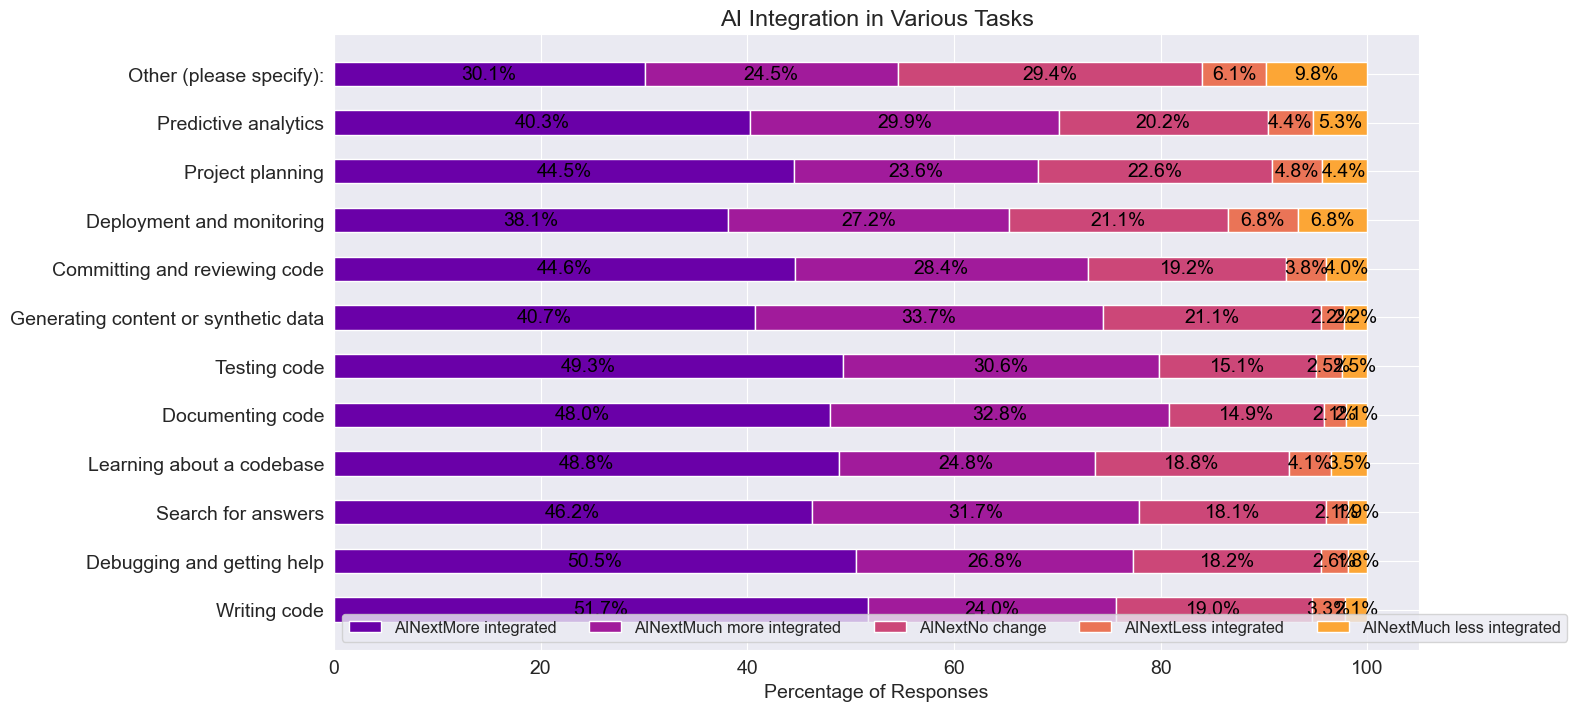

In [20]:
import numpy as np
category_names = []
def plot_by_ai(target_colunms):
    ai_df = split_multicolumn(survey_df[target_colunms])
    ai_df.drop(columns=target_colunms, inplace=True)
    category_names.append(target_colunms)
    ai_count = ai_df.sum()
    return ai_count.to_frame().transpose()

a = plot_by_ai('AINextMore integrated')
b = plot_by_ai('AINextMuch more integrated')
c = plot_by_ai('AINextNo change')
d = plot_by_ai('AINextLess integrated')
e = plot_by_ai('AINextMuch less integrated')

a = pd.concat([a, b, c, d, e], ignore_index=True)
results = a.to_dict('list')


data = np.array(list(results.values()))
data = data / data.sum(axis=1)[:, np.newaxis] * 100
data_cum = data.cumsum(axis=1)
labels = list(results.keys())
category_colors = plt.get_cmap('plasma')(np.linspace(0.2, 0.8, data.shape[1]))

# # Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each category
for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    
    # Adding percentage labels
    for y, (x, w) in enumerate(zip(starts, widths)):
        ax.text(x + w/2, y, f'{w:.1f}%', ha='center', va='center', color='black')

# Add legend
ax.legend(ncol=len(category_names), loc='lower left', fontsize='small')

# Labeling and title
ax.set_xlabel('Percentage of Responses')
ax.set_title('AI Integration in Various Tasks')

plt.show()


